# Fluorescence intensity and Frequency of Parents

In this vignette we will cover how to calculate MFIs and FOPs and visualize them.

We will first import necessary libraries and read our dataset we created in earlier vignettes.

In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [19]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages/",
                          file_name = "raw_dataset_stained")
dataset

AnnData object with n_obs × n_vars = 2450306 × 20
    obs: 'staining', 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'settings', 'pca_CD45+_transformed', 'pca_CD45+_logicle', 'gate_frequencies'
    obsm: 'X_pca_CD45+_logicle', 'X_pca_CD45+_transformed', 'gating'
    varm: 'pca_CD45+_logicle', 'pca_CD45+_transformed'
    layers: 'compensated', 'logicle', 'transformed'

## MFI calculation

In order to calculate the MFI, we use the `fp.tl.mfi()` function. Note that by default, MFIs are calculated by `sample_ID`. We will later showcase how to calculate MFI on different variables.  

Currently, we will calculate the median fluorescence intensity on the compensated data. In order to calculate the mean, pass `method='mean`. If calculations on other data layers are needed, pass the `layer` argument, specifying the data stored in `.layers`.

In [4]:
fp.tl.mfi(dataset)

In [5]:
dataset

AnnData object with n_obs × n_vars = 2450306 × 20
    obs: 'staining', 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'settings', 'pca_CD45+_transformed', 'pca_CD45+_logicle', 'gate_frequencies', 'mfi_sample_ID_compensated'
    obsm: 'X_pca_CD45+_logicle', 'X_pca_CD45+_transformed', 'gating'
    varm: 'pca_CD45+_logicle', 'pca_CD45+_transformed'
    layers: 'compensated', 'logicle', 'transformed'

We have a new entry in the `.uns` slot called `mfi_sample_ID_compensated`. This entry contains a dataframe, where median fluorescence values for each channel and gate are stored.

In [6]:
dataset.uns["mfi_sample_ID_compensated"].head()

,,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,GFP,B220,CD4,Siglec-F,CD8,Ly6C,NK1.1,CD11b,Ly6G,DAPI,CD3,F4_80,CD45,Time
sample_ID,gate,,,,,,,,,,,,,,,,,,,,
11,root/cells,133443.234375,119058.652344,122137.394531,38624.003906,36014.041016,76540.160156,127.794876,109.917522,-18.103258,74.135475,408.144058,249.207123,22.688130,139.327660,-57.340120,1260.633911,70.686916,46.031918,1707.404358,19.199318
12,root/cells,140772.328125,124422.710938,124205.296875,47709.519531,45127.750000,79265.210938,233.019485,112.786469,-32.957512,74.586716,385.162079,2023.613403,47.331848,1269.332886,-35.532528,1502.565552,81.487892,56.261284,2006.830933,18.206221
13,root/cells,134818.671875,120832.539062,122160.945312,38974.097656,36839.359375,76395.578125,191.137650,135.872894,-10.295650,79.315895,401.158356,412.952423,55.898453,166.824615,-61.612671,1276.863892,78.963295,61.515224,1939.693726,24.721586
14,root/cells,136966.250000,121361.726562,123618.257812,43038.148438,40041.062500,78246.851562,118.131294,133.452423,-23.271145,73.270729,355.407837,1130.800659,35.031693,271.262695,-48.361839,1392.066284,73.971474,48.489834,2045.860962,20.997778
15,root/cells,132058.265625,118656.210938,121971.609375,37151.539062,34822.558594,76196.960938,174.226944,148.596176,-21.143461,83.881248,420.505432,272.381622,43.345253,143.740891,-72.722580,1183.359985,77.483955,55.742638,1947.556885,21.019920


## MFI visualization

In order to visualize the data, we use the `fp.pl.mfi()` function. Similar to the previous `fp.pl.cell_counts()` and `fp.pl.gate_frequency()`, we use a categorical boxplot.  

The `gate` parameter is used to specify the population. The default `layer` argument is 'compensated', so we access the previously calculated data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


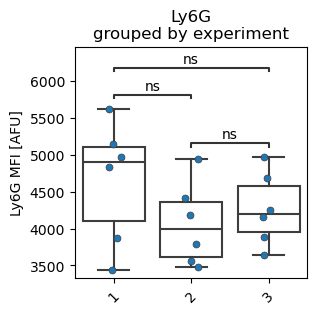

In [7]:
fp.pl.mfi(dataset, gate = "Neutrophils", groupby = "experiment", marker = "Ly6G")

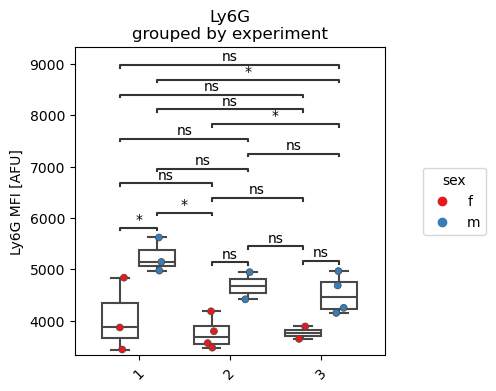

In [8]:
fp.pl.mfi(dataset,
          gate = "Neutrophils",
          groupby = "experiment",
          splitby = "sex",
          stat_test = "Kruskal",
          marker = "Ly6G",
          figsize = (4,4))

We can also plot the data as an expression heatmap. Here, we use the MFI values. Each row corresponds to a marker, and every column is a sample.  

We use the `metadata_annotation` parameter in order to visualize the metadata on the same heatmap.

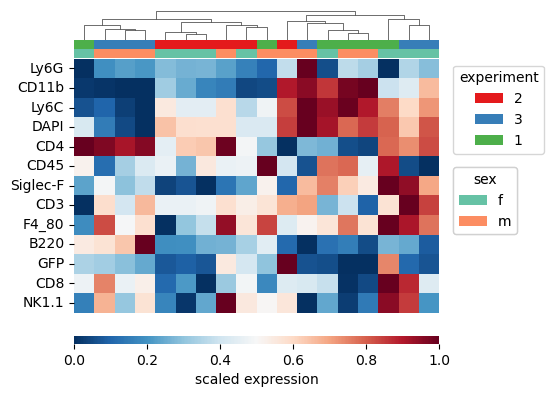

In [9]:
fp.pl.expression_heatmap(dataset, gate = "CD45+", metadata_annotation = ["experiment", "sex"])

Often times, heatmaps can be misleading due to internal scaling. We can plot the raw MFI values for a specific marker on top by using the `metadata_annotation` parameter.

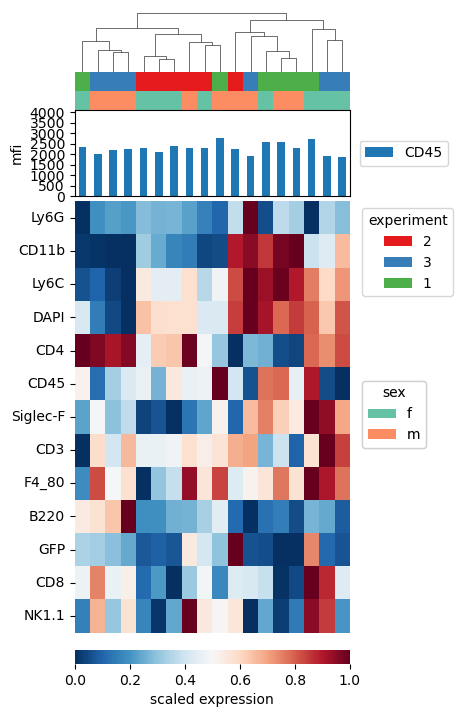

In [10]:
fp.pl.expression_heatmap(dataset,
                         gate = "CD45+",
                         metadata_annotation = ["experiment", "sex"],
                         marker_annotation = "CD45",
                         figsize = (4,7))

## FOP calculation

In order to calculate the frequency of positives, a cutoff needs to be defined above which cells are counted as marker-positive.

In this example, we already performed the calculation of these cofactors, and these are stored in the `.var` slot.

In [11]:
dataset.var

,pns,png,pne,pnr,type,pnn,cofactors
FSC-A,FSC-A,1.0,"(0.0, 0.0)",262144,scatter,FSC-A,1.0
FSC-H,FSC-H,1.0,"(0.0, 0.0)",262144,scatter,FSC-H,1.0
FSC-W,FSC-W,1.0,"(0.0, 0.0)",262144,scatter,FSC-W,1.0
SSC-A,SSC-A,1.0,"(0.0, 0.0)",262144,scatter,SSC-A,1.0
SSC-H,SSC-H,1.0,"(0.0, 0.0)",262144,scatter,SSC-H,1.0
SSC-W,SSC-W,1.0,"(0.0, 0.0)",262144,scatter,SSC-W,1.0
GFP,GFP,1.0,"(0.0, 0.0)",262144,fluo,GFP-A,604.5583
B220,B220,1.0,"(0.0, 0.0)",262144,fluo,APC-A,621.9474
CD4,CD4,1.0,"(0.0, 0.0)",262144,fluo,APC-H7-A,263.38608
Siglec-F,Siglec-F,1.0,"(0.0, 0.0)",262144,fluo,BV421-A,5008.094


We can now calculate the frequency of parents using the `fp.tl.fop()` function. Similar to the MFI, FOPs are calculated per sample_ID and stored in the `.uns` slot.

In [12]:
fp.tl.fop(dataset)
dataset

AnnData object with n_obs × n_vars = 2450306 × 20
    obs: 'staining', 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'settings', 'pca_CD45+_transformed', 'pca_CD45+_logicle', 'gate_frequencies', 'mfi_sample_ID_compensated', 'fop_sample_ID_compensated'
    obsm: 'X_pca_CD45+_logicle', 'X_pca_CD45+_transformed', 'gating'
    varm: 'pca_CD45+_logicle', 'pca_CD45+_transformed'
    layers: 'compensated', 'logicle', 'transformed'

## FOP visualization

We use similar plotting capabilities for the display of FOPs.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


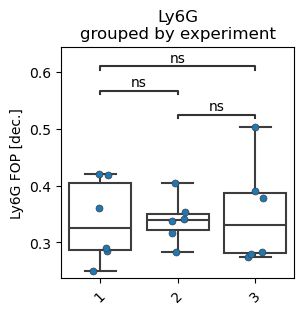

In [13]:
fp.pl.fop(dataset,
          marker = "Ly6G",
          gate = "CD45+",
          groupby = "experiment")

As Ly6G is a marker for Neutrophils, we expect the FOP to be very similar to the gate frequency of Neutrophils:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


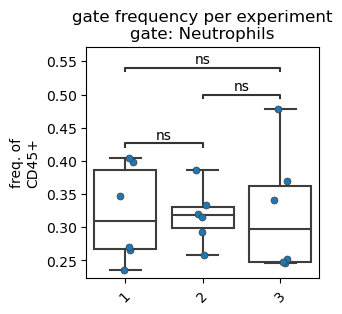

In [14]:
fp.pl.gate_frequency(dataset,
                     gate = "Neutrophils",
                     freq_of = "CD45+",
                     groupby = "experiment")

We can use the same expression heatmap as above, passing `data_metric=fop`. This will display the frequency of parents per sample as described above. Similarly, we display the frequency of Ly6G positive cells on top of the plot.

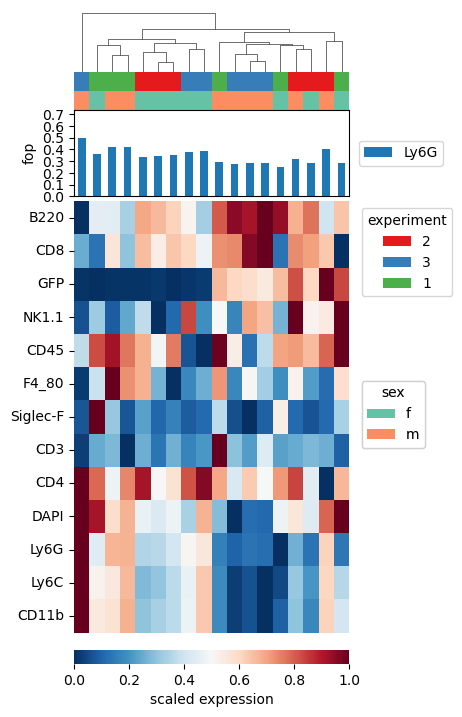

In [15]:
fp.pl.expression_heatmap(dataset,
                         gate = "CD45+",
                         data_metric = "fop",
                         metadata_annotation = ["experiment", "sex"],
                         marker_annotation = "Ly6G",
                         figsize = (4,7))

## Save the dataset

Since we performed the mfi and fop analysis, we save the dataset.

In [16]:
fp.save_dataset(dataset,
                file_name = "../../Tutorials/mouse_lineages/raw_dataset_stained_mfi",
                overwrite = True)

File saved successfully
